# **Make Pretrained-Model FaceNet !**


## 0.미션


### (1) 미션1
여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 사전 학습 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 만들어야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - Keras에는 **실제로 존재하는 이미지 데이터를 처리**해주는 함수가 있습니다.

### (2) 미션2
데이터셋을 **학습에 적합한 형태**로 만들었다면, **FaceNet 모델로 Transfer Learning**을 수행합니다.

- 1) FaceNet 모델 구조를 생성합니다.
    - [FaceNet 논문 링크](https://arxiv.org/abs/1503.03832)
    - FaceNet의 Input은 (160, 160) 사이즈의 이미지입니다.
- 2) FaceNet 모델 구조 + 구조 추가
    - FaceNet의 Output은 128차원의 벡터입니다.
    - 이 과정을 Transfer Learning라고 합니다.

### (3) 미션3
학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선시키세요.

그 후, 모델의 구조와 가중치를 **반드시 저장**하여 여러분의 노트북에 옮기세요.

- 1) 다양한 모델을 사용해보세요.
    - 모델에 정해진 정답은 없습니다.
    - 성능 지표에서 무엇이 중요한지 깊게 생각하세요.
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 여러분만의 모델을 만드셔도 좋습니다!
- 2) 모델을 **반드시 저장**하세요.
    - .keras 형태로 우선 Colab에 저장하세요.
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드** 합니다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/project4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [3]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.4 MB/s eta 0:00:00


## 3.미션1

여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 사전 학습 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 만들어야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - Keras에는 **실제로 존재하는 이미지 데이터를 처리**해주는 함수가 있습니다.

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 데이터셋은 두 개의 압축 파일이어야 합니다.
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
            2. 여러분의 얼굴 이미지 데이터셋
                - 여러분의 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장합니다.
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸립니다.
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**하세요.
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장합니다.
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것입니다.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [4]:
import os
import zipfile

In [5]:
data_myFace = path + '/Keras/my_face_512_5000.zip'
data_myFace

'/content/drive/MyDrive/project4/Keras/my_face_512_5000.zip'

In [6]:
## Colab에 생성할 본인 얼굴 폴더 경로
extract_folder = '/content/my_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_myFace, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [7]:
## 생성된 본인 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

4796

#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [8]:
data_other = path + '/Keras/lfw-deepfunneled.zip'
data_other

'/content/drive/MyDrive/project4/Keras/lfw-deepfunneled.zip'

In [9]:
## Colab에 생성할 다른 얼굴 폴더 경로
extract_folder = '/content/other_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_other, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [10]:
## 생성된 다른 사람 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

13233

### (etc) 이미지의 명암, 채도 확인해보기
- 수집한 나의 얼굴과 LFW 데이터셋 이미지의 명암과 채도가 차이가 있을까?!

In [11]:
import os
import cv2
import numpy as np

In [12]:
myFace_list = []

for img in os.listdir('/content/my_face') :
    if img.endswith(('jpg')) :
        temp = os.path.join('/content/my_face', img)
        myFace_list.append(temp)

In [13]:
otherFace_list = []

for img in os.listdir('/content/other_face') :
    if img.endswith(('jpg')) :
        temp = os.path.join('/content/other_face', img)
        otherFace_list.append(temp)

In [14]:
len(myFace_list), len(otherFace_list)

(4796, 13233)

In [15]:
myFace_v, myFace_s = [], []

for myImg in myFace_list :
    img = cv2.imread(myImg)

    if img is None :
        print(f'{myImg} 이미지 로드 불가')
        continue

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    _, s, v = cv2.split(hsv_img)

    v_mean = np.mean(v)
    s_mean = np.mean(s)

    myFace_v.append(v_mean)
    myFace_s.append(s_mean)

In [16]:
print(f'저의 얼굴 이미지들의 명암의 평균 : {np.mean(myFace_v):.2f}' )
print(f'저의 얼굴 이미지들의 채도의 평균 : {np.mean(myFace_s):.2f}' )

저의 얼굴 이미지들의 명암의 평균 : 106.59
저의 얼굴 이미지들의 채도의 평균 : 46.36


In [17]:
otherFace_v, otherFace_s = [], []

for otherImg in otherFace_list :
    img = cv2.imread(otherImg)

    if img is None :
        print(f'{otherImg} 이미지 로드 불가')
        continue

    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    _, s, v = cv2.split(hsv_img)

    v_mean = np.mean(v)
    s_mean = np.mean(s)

    otherFace_v.append(v_mean)
    otherFace_s.append(s_mean)

In [18]:
print(f'다른 얼굴 이미지들의 명암의 평균 : {np.mean(otherFace_v):.2f}' )
print(f'다른 얼굴 이미지들의 채도의 평균 : {np.mean(otherFace_s):.2f}' )

다른 얼굴 이미지들의 명암의 평균 : 113.55
다른 얼굴 이미지들의 채도의 평균 : 93.62


### (2) 데이터셋 전처리
* **세부 요구사항**
    - 데이터셋을 전처리 합니다.
        - Training set, Validation set, Test set으로 데이터셋을 나누어 주세요.
            - 학습 과정에서 Training set, Validation set을 사용해야 합니다.
            - 추론 과정에서 Test set을 사용해야 합니다.
        - Keras의 **특정 함수**가 실제 존재하는 이미지 파일에 대한 전처리를 쉽게 도와줍니다.
        - **특정 함수**에서 요구하는 폴더 구조가 있습니다. **특정 함수**를 사용한다면 이에 맞춰서 폴더를 생성해야 합니다.
        - 각 데이터셋에 스케일링도 적용하세요.
    - 예시 코드에서 사용한 라이브러리
        - glob, random, shutil, numpy, keras

#### 1) 데이터셋 분할

In [19]:
import glob
import random
import shutil
import numpy as np

from keras.utils import load_img, img_to_array
from keras.utils import image_dataset_from_directory

In [20]:
## image_dataset_from_directory를 사용하기 위해 Colab에 폴더 생성

## 생성될 폴더의 경로
tr_data = '/content/tr_data'
te_data = '/content/te_data'

## 폴더가 존재하지 않을 때 폴더를 생성
if not os.path.exists(tr_data) :
    os.makedirs(tr_data)

if not os.path.exists(te_data) :
    os.makedirs(te_data)

## 폴더 생성 확인
print(os.path.exists(tr_data) )
print(os.path.exists(te_data) )

True
True


In [21]:
## Keras의 image_dataset_from_directory를 사용하기 위해 Colab에 하위 폴더 생성

## 생성될 폴더에 대한 하위 폴더 생성
class_names = ['my', 'other']

for cn in class_names :
    temp = os.path.join(tr_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

for cn in class_names :
    temp = os.path.join(te_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

True
True
True
True


In [22]:
## 본인 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_my = sorted(glob.glob('/content/my_face/*',))

## 다른 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_other = sorted(glob.glob('/content/other_face/*'))

## 이미지 갯수 확인
len(img_list_my), len(img_list_other)

(4796, 13233)

In [23]:
## 얼굴 데이터를 Training set, Test set으로 분할하기 위한 사전 작업
## 분할 재현성을 위한 난수 고정
random.seed(2024)
random.shuffle(img_list_my)
random.shuffle(img_list_other)

img_list_my[:5], img_list_other[:5]

(['/content/my_face/my_face_3287.jpg',
  '/content/my_face/my_face_1121.jpg',
  '/content/my_face/my_face_1105.jpg',
  '/content/my_face/my_face_198.jpg',
  '/content/my_face/my_face_2929.jpg'],
 ['/content/other_face/Steven_Curtis_Chapman_0001.jpg',
  '/content/other_face/Robert_Downey_Jr_0001.jpg',
  '/content/other_face/Guillermo_Coria_0002.jpg',
  '/content/other_face/Raul_Mondesi_0001.jpg',
  '/content/other_face/Scott_McClellan_0003.jpg'])

In [24]:
## Test set의 비율 설정
test_size = 0.2

## 나의 얼굴 파일 리스트와 다른 얼굴 파일 리스트에 대한 반복문
for i_l in [img_list_my, img_list_other] :
    ## 리스트의 길이 체크
    list_len = 4796  ## 예시 파일의 이미지 갯수가 맞지 않아서 4796개까지만 사용
    ## 데이터 분할을 위한 인덱스 설정
    split_idx = int(list_len * (1 - test_size) )

    ## 인덱스를 이용해 상위 리스트를 Training set, Test set 2가지로 세분화
    list_tr = i_l[ : split_idx]
    list_te = i_l[split_idx : list_len]

    ## 현재 리스트가 나의 얼굴 파일 리스트와 같다면
    if i_l == img_list_my :
        ## "나의 얼굴 파일 리스트"의 파일을 Training set 폴더 안의 "나의 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_tr :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=tr_data+'/my/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

        ## "나의 얼굴 파일 리스트"의 파일을 Test set 폴더 안의 "나의 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_te :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=te_data+'/my/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

    ## 현재 리스트가 "나의 얼굴 파일 리스트"가 아니라면 (즉, "다른 사람 얼굴 파일 리스트"라면)
    else :
        ## "다른 사람 얼굴 파일 리스트"의 파일을 Training set 폴더 안의 "다른 사람 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_tr :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=tr_data+'/other/'+f_name[-1],
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

        ## "다른 사람 얼굴 파일 리스트"의 파일을 Test set 폴더 안의 "다른 사람 얼굴 폴더"로 복사
        ## 이동이 잘못 되었을 경우를 생각하여 복사로 진행
        for file_path in list_te :
            f_name = file_path.split('/')
            shutil.copy(src=file_path,
                        dst=te_data+'/other/'+f_name[-1]
                        )
            print(f'파일 이동 완료 : {f_name[-1]}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
파일 이동 완료 : my_face_4583.jpg
파일 이동 완료 : my_face_380.jpg
파일 이동 완료 : my_face_2254.jpg
파일 이동 완료 : my_face_4799.jpg
파일 이동 완료 : my_face_2956.jpg
파일 이동 완료 : my_face_3372.jpg
파일 이동 완료 : my_face_3602.jpg
파일 이동 완료 : my_face_1189.jpg
파일 이동 완료 : my_face_2356.jpg
파일 이동 완료 : my_face_202.jpg
파일 이동 완료 : my_face_1509.jpg
파일 이동 완료 : my_face_432.jpg
파일 이동 완료 : my_face_1822.jpg
파일 이동 완료 : my_face_956.jpg
파일 이동 완료 : my_face_2226.jpg
파일 이동 완료 : my_face_2981.jpg
파일 이동 완료 : my_face_743.jpg
파일 이동 완료 : my_face_3617.jpg
파일 이동 완료 : my_face_4910.jpg
파일 이동 완료 : my_face_108.jpg
파일 이동 완료 : my_face_3559.jpg
파일 이동 완료 : my_face_4324.jpg
파일 이동 완료 : my_face_1374.jpg
파일 이동 완료 : my_face_70.jpg
파일 이동 완료 : my_face_4809.jpg
파일 이동 완료 : my_face_754.jpg
파일 이동 완료 : my_face_4571.jpg
파일 이동 완료 : my_face_2657.jpg
파일 이동 완료 : my_face_128.jpg
파일 이동 완료 : my_face_4232.jpg
파일 이동 완료 : my_face_4889.jpg
파일 이동 완료 : my_face_2730.jpg
파일 이동 완료 : my_face_1020.jpg
파일 이동 완료 : my_face_3583.jpg
파일 이동 완료 : my_face_191

In [25]:
print('Training data의 my_face 이미지 수 : ', len(os.listdir('/content/tr_data/my')))
print('Training data의 other_face 이미지 수 : ', len(os.listdir('/content/tr_data/other')))

print('Test data의 my_face 이미지 수 : ', len(os.listdir('/content/te_data/my')))
print('Test data의 other_face 이미지 수 : ', len(os.listdir('/content/te_data/other')))

Training data의 my_face 이미지 수 :  3836
Training data의 other_face 이미지 수 :  3836
Test data의 my_face 이미지 수 :  960
Test data의 other_face 이미지 수 :  960


#### 2) **특정 함수** 사용

In [26]:
## Training set 데이터 폴더를 데이터셋화
## 이 과정에서 Validation set도 생성
tr_idfd, val_idfd = image_dataset_from_directory(tr_data,                    ## Training 폴더 경로
                                                 class_names=['other','my'], ## 클래스 순서 지정
                                                 batch_size=32,              ## 이미지 덩어리 단위
                                                 image_size=(256,256),       ## 이미지 리사이즈
                                                 shuffle=True,               ## 섞어야 올바르게 분할됨
                                                 seed=2024,                  ## 재현성
                                                 validation_split=0.2,       ## 데이터 스플릿 비율
                                                 subset='both',              ## 데이터셋 나눔 방식
                                                 )

Found 7672 files belonging to 2 classes.
Using 6138 files for training.
Using 1534 files for validation.


In [27]:
## Test set 데이터 폴더를 데이터셋화
te_idfd = image_dataset_from_directory(te_data,                    ## Test 폴더 경로
                                       class_names=['other','my'], ## 클래스 순서 지정
                                       batch_size=32,              ## 이미지 덩어리 단위
                                       image_size=(256,256),       ## 이미지 리사이즈
                                       shuffle=True,               ## 섞어야 올바르게 분할됨
                                       seed=2024                   ## 재현성
                                       )

Found 1920 files belonging to 2 classes.


In [28]:
## 위에서 만든 이미지 데이터 덩어리가 몇 개인지 확인
len(tr_idfd), len(val_idfd), len(te_idfd)

(192, 48, 60)

In [29]:
192*32, 48*32, 60*32

(6144, 1536, 1920)

In [30]:
tr_idfd

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### 3) 스케일링

In [31]:
def rescale(image, label) :
    image = image / 255
    return image, label

In [32]:
tr_idfd_rescale = tr_idfd.map(rescale)
val_idfd_rescale = val_idfd.map(rescale)
te_idfd_rescale = te_idfd.map(rescale)

## 4.미션2

데이터셋을 **학습에 적합한 형태**로 만들었다면, CNN 모델을 생성하여 학습시켜 보세요!

In [33]:
import keras

from keras.utils import clear_session, plot_model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

In [34]:
clear_session()

model = Sequential()

model.add( Input(shape=(256,256,3)) )
model.add( Conv2D(64, 3, 1, 'same', activation='relu') )
model.add( Conv2D(64, 3, 1, 'same', activation='relu') )
model.add( MaxPool2D(2, 2) )
model.add( BatchNormalization() )
model.add( Dropout(0.35) )

model.add( Conv2D(128, 3, 1, 'same', activation='relu') )
model.add( Conv2D(128, 3, 1, 'same', activation='relu') )
model.add( MaxPool2D(2, 2) )
model.add( BatchNormalization() )
model.add( Dropout(0.35) )

model.add( Flatten() )
model.add( Dense(1, activation='sigmoid') )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         524,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785,217 (3.00 MB)

 Trainable params: 784,833 (2.99 MB)

 Non-trainable params: 384 (1.50 KB)

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'precision', 'recall']
              )

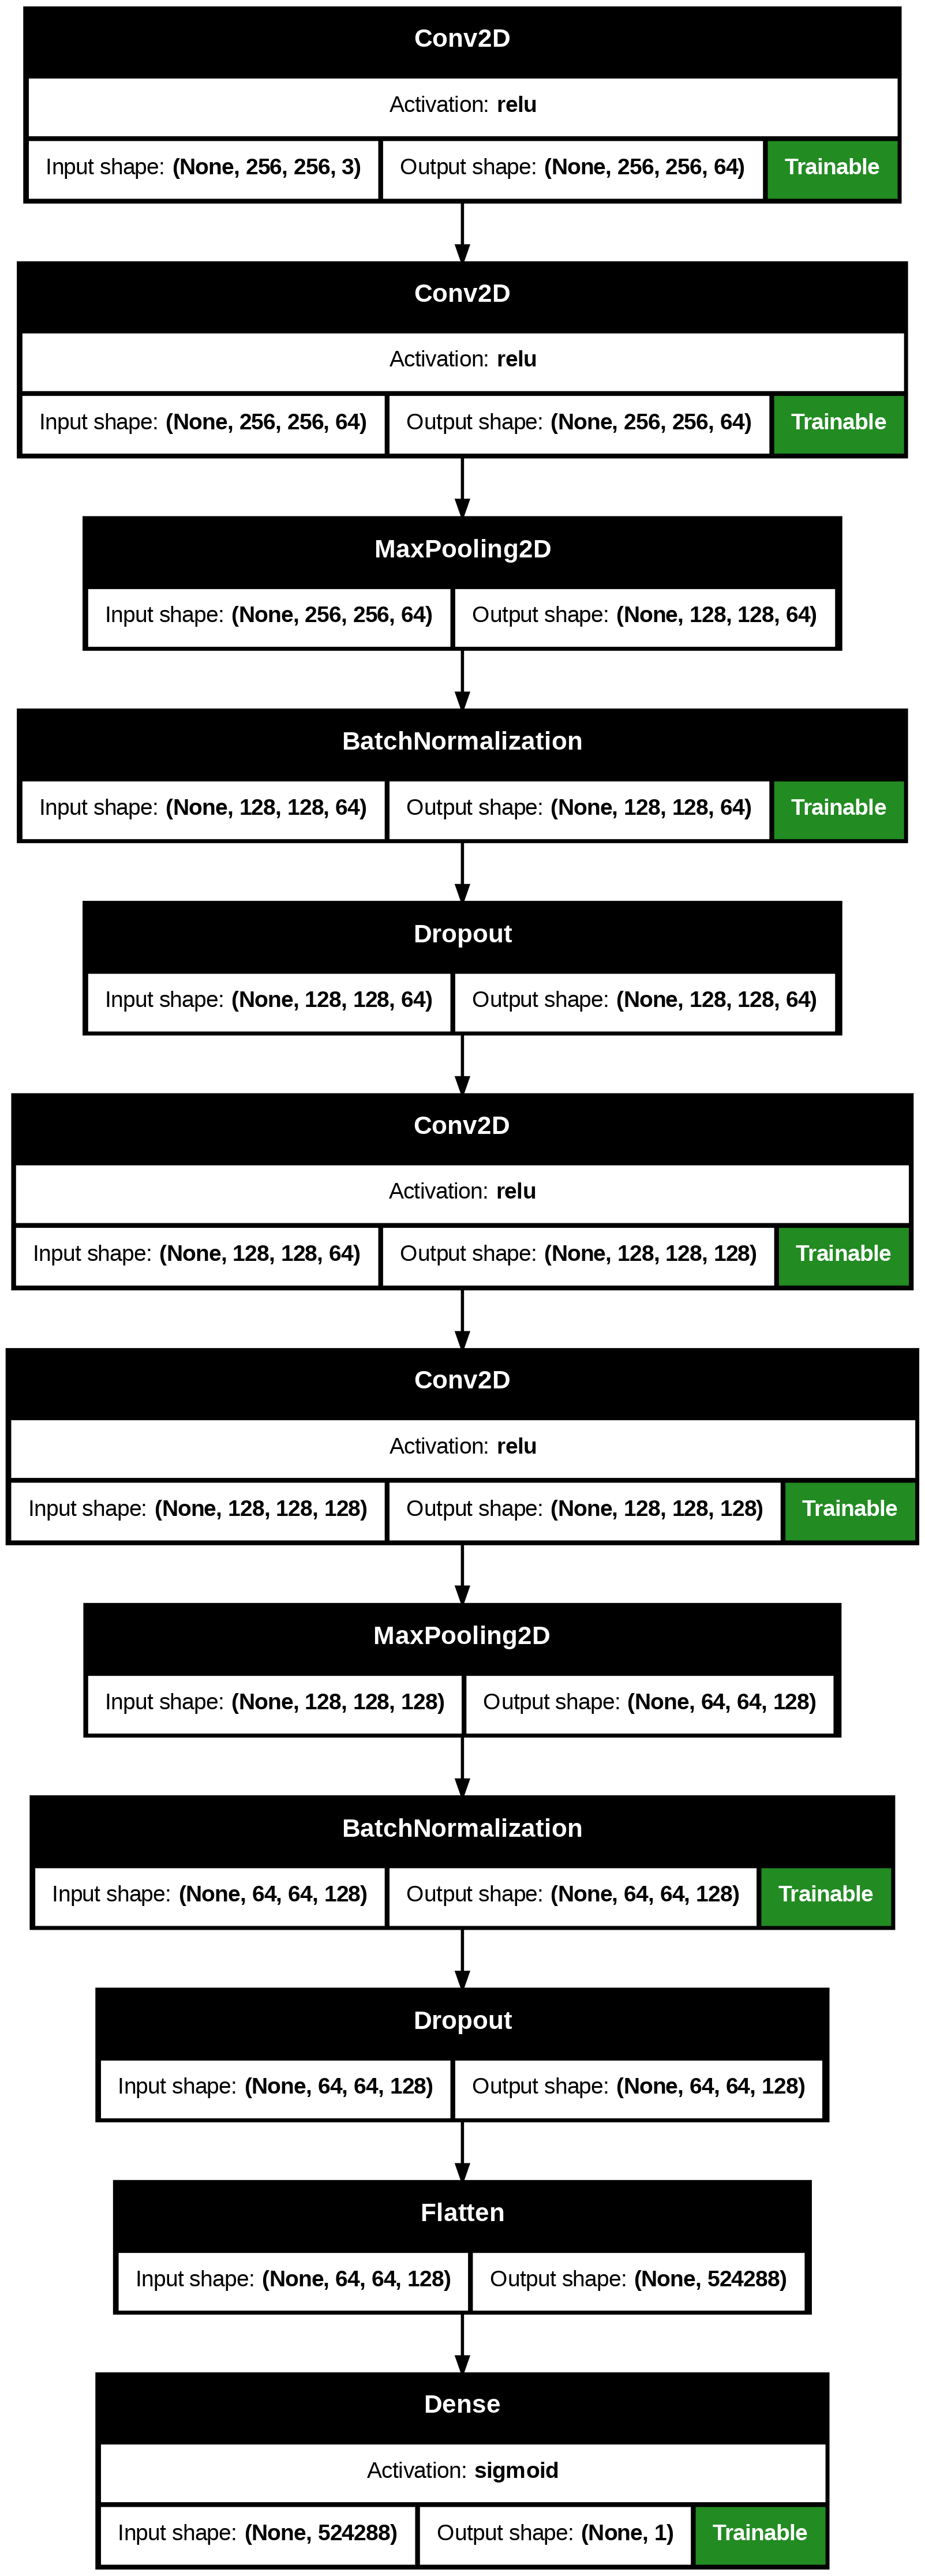

In [36]:
plot_model(model, show_shapes=True, show_trainable=True, show_layer_activations=True)

## 5.미션3

학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선시키세요.

그 후, 모델의 구조와 가중치를 **반드시 저장**하여 여러분의 노트북에 옮기세요.

- 1) 다양한 모델을 사용해보세요.
    - 모델에 정해진 정답은 없습니다.
    - 성능 지표에서 무엇이 중요한지 깊게 생각하세요.
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 여러분만의 모델을 만드셔도 좋습니다!
- 2) 모델을 **반드시 저장**하세요.
    - .keras 형태로 우선 Colab에 저장하세요.
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드** 합니다.

### (1) 모델 학습

* **세부 요구사항**
    - 모델 구조를 잘 변형하였다면, 학습도 진행해야 합니다.
        - Keras에서 지원하는 다양한 함수를 사용하세요.
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 학습에 유용한 함수 불러오기

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
## 얼리스토핑 설정
es = EarlyStopping(patience=3, verbose=1, restore_best_weights=True)

#### 2) 모델 학습

In [39]:
## 모델 학습
model.fit(tr_idfd_rescale, validation_data=val_idfd_rescale,
          epochs=1000, verbose=1,
          callbacks=[es]
          )

Epoch 1/1000
192/192 ━━━━━━━━━━━━━━━━━━━━ 125s 493ms/step - accuracy: 0.9871 - loss: 0.2719 - precision: 0.9790 - recall: 0.9960 - val_accuracy: 0.9980 - val_loss: 0.0555 - val_precision: 0.9960 - val_recall: 1.0000
Epoch 2/1000
192/192 ━━━━━━━━━━━━━━━━━━━━ 55s 286ms/step - accuracy: 0.9987 - loss: 0.0747 - precision: 0.9983 - recall: 0.9992 - val_accuracy: 0.9850 - val_loss: 1.0605 - val_precision: 0.9702 - val_recall: 1.0000
Epoch 3/1000
192/192 ━━━━━━━━━━━━━━━━━━━━ 82s 286ms/step - accuracy: 0.9987 - loss: 0.1694 - precision: 0.9979 - recall: 0.9995 - val_accuracy: 1.0000 - val_loss: 9.7255e-17 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/1000
192/192 ━━━━━━━━━━━━━━━━━━━━ 82s 285ms/step - accuracy: 0.9993 - loss: 0.0405 - precision: 0.9986 - recall: 1.0000 - val_accuracy: 0.9980 - val_loss: 0.0761 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 5/1000
192/192 ━━━━━━━━━━━━━━━━━━━━ 56s 291ms/step - accuracy: 0.9994 - loss: 0.0341 - precision: 0.9992 - recall: 0.9996 - val_a

### (2) 모델 추론

* **세부 요구사항**
    - 학습된 모델의 성능을 확인해보세요.
        - 임계값 조절, 클래스 가중치 부여 등으로 모델의 성능을 높여보세요.
    - 예시 코드에서 사용한 라이브러리
        - keras, sklearn

#### 1) 모델 추론

In [40]:
## image_dataset_from_directory로 만든 Test set로 예측값 생성
y_pred = model.predict(te_idfd_rescale)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step


array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [41]:
## 예측값에 대한 임계값을 0.5로 설정하여 0과 1로 구분
y_pred_fix = np.where(y_pred>=0.5, 1, 0)
y_pred_fix = y_pred_fix.flatten()
y_pred_fix

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
len(y_pred_fix.nonzero()[0])

960

#### 2) 성능 확인

In [43]:
from sklearn.metrics import classification_report

In [47]:
## 성능 확인을 위하여 Test set의 Y만 떼와 array로 저장
temp = []

for te_x, te_y in te_idfd_rescale :
    temp.append(te_y.numpy())

y_true = np.concatenate(temp)

In [48]:
len(y_true.nonzero()[0])

960

In [49]:
print(classification_report(y_true, y_pred_fix, target_names=['other', 'my']) )

              precision    recall  f1-score   support

       other       0.53      0.53      0.53       960
          my       0.53      0.53      0.53       960

    accuracy                           0.53      1920
   macro avg       0.53      0.53      0.53      1920
weighted avg       0.53      0.53      0.53      1920



### (3) 모델 저장

* **세부 요구사항**
    - **반드시 반드시 모델을 저장하고 로컬에 다운로드하세요.**
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 모델 저장

In [51]:
## .keras로 저장해야 안전
model.save('FaceNet_1029_CNN.keras')

#### 2) 저장된 모델 체크

In [ ]:
## Colab에 저장된 모델을 불러와 확인
temp_model = keras.saving.load_model('./FaceNet_1029_CNN.keras')
temp_model.summary()